**Srayan Gangopadhyay**
*14th May 2020*

# Introducing the code

Required modules

In [1]:
import scipy as sp
import matplotlib.pyplot as plt

We are solving an ODE in the form  $\frac{\mathrm{d}y}{\mathrm{d}x} = f(y)$. Here, we define the right-hand-side of the equation, along with the initial value and the parameters for the Euler method

In [2]:
def func(y):  # RHS of ODE in form dy/dx= 
    return y

# PARAMETERS
y0 = 1  # initial value
delta = 0.2  # step size
end = 5  # x-value to stop integration

We then create an array of `x`-values (effectively _discretising_ our equation) and initialise an empty array of the same size to store the solution.

In [3]:
steps = int(end/delta)  # number of steps
x = sp.linspace(0, end, steps+1)  # array of x-values
y = sp.zeros(steps+1)  # empty array for solution
y[0] = y0  # inserting initial value

The integration is carried out simply by iterating over the solution array `y` and calculating each value by 
* assuming that $\frac{\mathrm{d}y}{\mathrm{d}x}$ (`func(y[i-1])`) remains constant in each interval
* calculating the change by multiplying $\frac{\mathrm{d}y}{\mathrm{d}x}$ by the step size (`delta`)
* adding the result to the previous y value

In [4]:
# INTEGRATING
for i in range(1, steps+1):
    y[i] = y[i-1] + (delta*func(y[i-1]))

We can then plot our solution

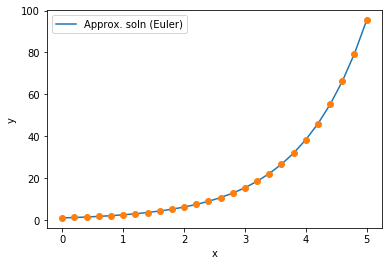

In [5]:
plt.plot(x, y, label='Approx. soln (Euler)')
plt.plot(x, y, 'o')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Testing
## $\frac{\mathrm{d}y}{\mathrm{d}x} = y$
$y(x) = \mathrm{e}^x$

Above, we solved $\frac{\mathrm{d}y}{\mathrm{d}x} = y$, which should give the solution $y(x) = \mathrm{e}^x$. We can show this on the same plot as our Euler method solution.

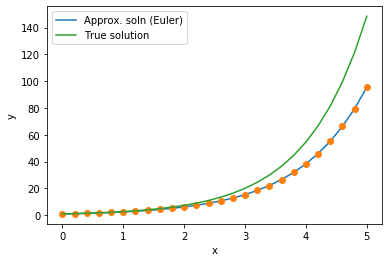

In [6]:
plt.plot(x, y, label='Approx. soln (Euler)')
plt.plot(x, y, 'o')
plt.plot(x, sp.exp(x), label='True solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

This looks as expected for the Euler method. We can now try other test cases with known solutions.

I am taking test cases from [Paul's online notes](http://tutorial.math.lamar.edu/Classes/DE/EulersMethod.aspx).

## $y' = 2 - \mathrm{e}^{-4x} - 2y,\: y(0)=1$
$y = 1 + 0.5 \mathrm{e}^{-4x} - 0.5 \mathrm{e}^{-2x}$

Here we need a slight adaptation to the code to allow the input to be a function of both x and y. I have also decreased the step size slightly to achieve a smoother result.

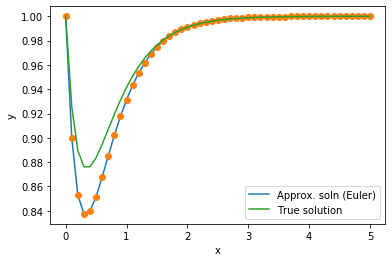

In [7]:
def func(y, x):  # RHS of ODE in form dy/dx= 
    return 2 - sp.exp(-4*x) - 2*y

# PARAMETERS
y0 = 1  # initial value
delta = 0.1  # step size
end = 5  # x-value to stop integration

steps = int(end/delta)  # number of steps
x = sp.linspace(0, end, steps+1)  # array of x-values
y = sp.zeros(steps+1)  # empty array for solution
y[0] = y0  # inserting initial value

# INTEGRATING
for i in range(1, steps+1):
    y[i] = y[i-1] + (delta*func(y[i-1], x[i-1]))

plt.plot(x, y, label='Approx. soln (Euler)')
plt.plot(x, y, 'o')
plt.plot(x, 1 + 0.5*sp.exp(-4*x) - 0.5*sp.exp(-2*x), label='True solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## $y' = y - 0.5{{\mathrm{e}}^{0.5x}}\sin{5x} + 5{{\mathrm{e}}^{0.5x}}\cos{5x},\: y(0)=0$
$y = \mathrm{e}^{0.5x} \sin{5x}$

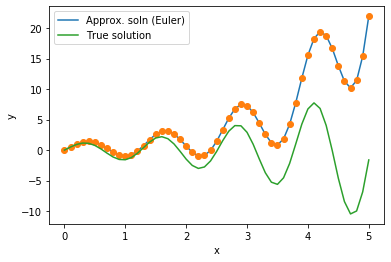

In [8]:
def func(y, x):  # RHS of ODE in form dy/dx= 
    return y - 0.5*sp.exp(0.5*x)*sp.sin(5*x) + 5*sp.exp(0.5*x)*sp.cos(5*x)

# PARAMETERS
y0 = 0  # initial value
delta = 0.1  # step size
end = 5  # x-value to stop integration

steps = int(end/delta)  # number of steps
x = sp.linspace(0, end, steps+1)  # array of x-values
y = sp.zeros(steps+1)  # empty array for solution
y[0] = y0  # inserting initial value

# INTEGRATING
for i in range(1, steps+1):
    y[i] = y[i-1] + (delta*func(y[i-1], x[i-1]))

plt.plot(x, y, label='Approx. soln (Euler)')
plt.plot(x, y, 'o')
plt.plot(x, sp.exp(0.5*x)*sp.sin(5*x), label='True solution')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()